Colorectal Cancer Risk & Survival Research Analysis 

Project Objective:
The goal of this project is to explore the factors associated with colorectal cancer outcomes using the provided dataset. This analysis will help healthcare professionals understand the risk factors, treatment access, and factors that contribute to survival and recurrence in patients.


The research is going to be based off these research questions:

### General Patient Demographics:

What is the distribution of patients across different ages, genders, and races?

What is the geographic distribution of patients based on region (urban vs. rural)?

How many patients have a family history or a previous cancer history?

### Stage and Tumor Characteristics:

What is the distribution of cancer stage at diagnosis across the dataset?

How does tumor aggressiveness vary with different stages of cancer?

### Lifestyle and Health Factors:

What is the distribution of dietary patterns (e.g., diet type) among patients?

How does BMI (Body Mass Index) correlate with the stage of cancer at diagnosis?

How active are patients in terms of physical activity levels?

What proportion of patients are smokers and how does smoking status affect cancer progression?

How does alcohol consumption correlate with cancer risk or survival rates?

What is the level of red meat consumption and its association with colorectal cancer incidence?

What is the fiber consumption distribution among patients?

### Screening and Diagnosis:

How does colonoscopy access correlate with early detection and stage at diagnosis?

What is the frequency of regular cancer screenings across different socioeconomic and geographic groups?

How much time does it take for patients to receive a diagnosis after the onset of symptoms?

### Insurance and Treatment Access:

How does insurance coverage affect treatment access, such as chemotherapy, radiotherapy, and surgery?

What are the treatment patterns (chemotherapy, radiotherapy, surgery) across different stages of cancer?

What is the proportion of patients receiving each treatment type?

### Outcomes: Survival and Recurrence:

What is the survival rate across different stages of cancer?

How does the time to diagnosis impact survival outcomes?

What is the relationship between treatment access (chemotherapy, radiotherapy, surgery) and survival rates?

How do patients' adherence to follow-up affect their survival rate?

What is the recurrence rate, and how does it relate to treatment types or patient demographics?

How long does it take for patients to experience cancer recurrence after treatment?


# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\SD\Downloads\archive (7)\colorectal_cancer_prediction.csv")

In [3]:
# Display the first few rows of the dataset
df.head()


,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


In [4]:
# Basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI                   

In [5]:

# Check for missing values
print(df.isnull().sum())

Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64


In [6]:
# Descriptive statistics for numerical columns
df.describe()

,Patient_ID,Age,BMI,Time_to_Recurrence
count,89945.000000,89945.000000,89945.000000,89945.000000
mean,44973.000000,54.332892,29.268105,29.543299
std,25965.029318,20.182220,6.211668,17.268440
min,1.000000,20.000000,18.500000,0.000000
25%,22487.000000,37.000000,23.900000,15.000000
50%,44973.000000,54.000000,29.300000,30.000000
75%,67459.000000,72.000000,34.600000,44.000000
max,89945.000000,89.000000,40.000000,59.000000


# Univariate Analysis (Visualizations)

In [7]:
# Define age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]  # Modify bins as needed
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Create a new column 'Age_Bin' to store the binned age categories
df['Age_Bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)





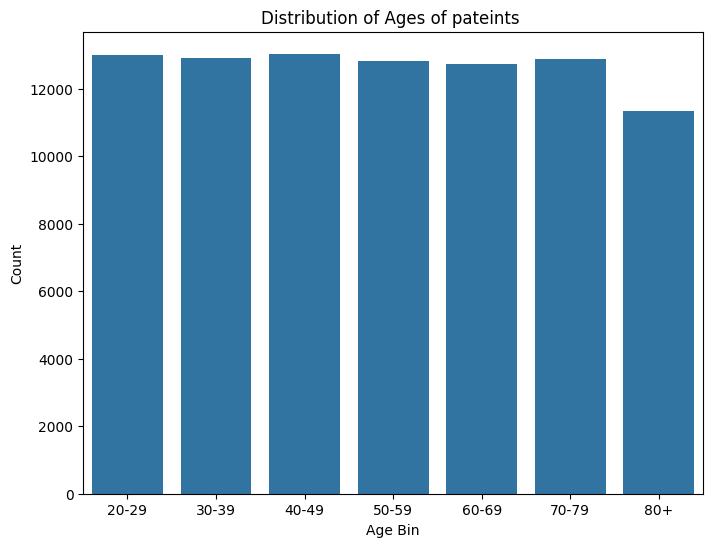

In [8]:
# Show the distribution of age bins
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Bin', data=df)
plt.title('Distribution of Ages of pateints ')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.show()



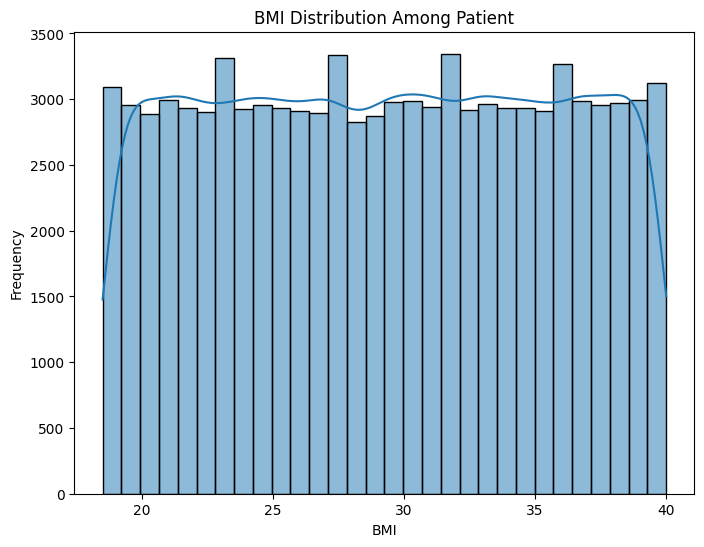

In [9]:
## Distribution of BMI among patient
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('BMI Distribution Among Patient')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

The dataset indicates that a BMI of 30-35 has the highest count among the patients, suggesting a notable prevalence of overweight or obesity within the studied group. This is significant because elevated BMI is a known risk factor for various colorectal health conditions, including colorectal cancer. The higher representation of patients with a BMI of 30-35 may highlight a potential area for further investigation regarding the relationship between BMI and colorectal health outcomes.

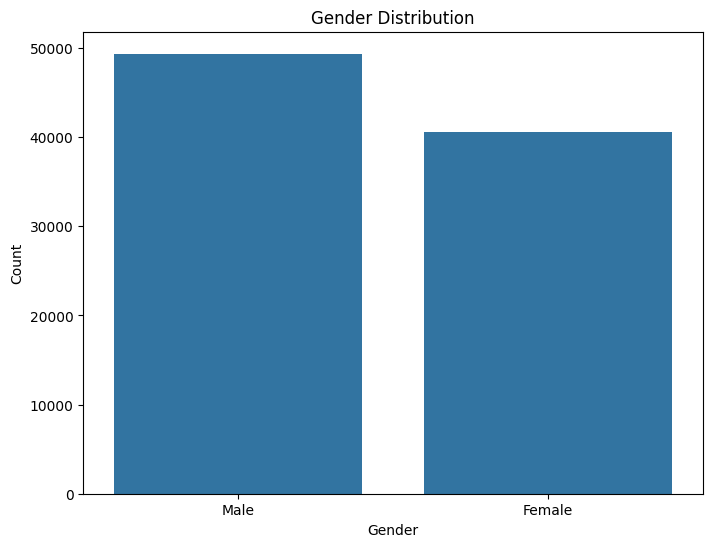

In [10]:
## Categorical Distribution - Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The dataset reveals an unequal gender distribution, with a higher number of male patients compared to female patients. This observation is crucial in understanding potential gender-related differences in colorectal health, which may warrant further investigation in the context of diagnosis, treatment, and outcomes. The prevalence of male patients in the dataset suggests that gender may play a role in colorectal conditions, and this finding could guide future studies to explore potential causes, risk factors, and therapeutic responses based on gender.


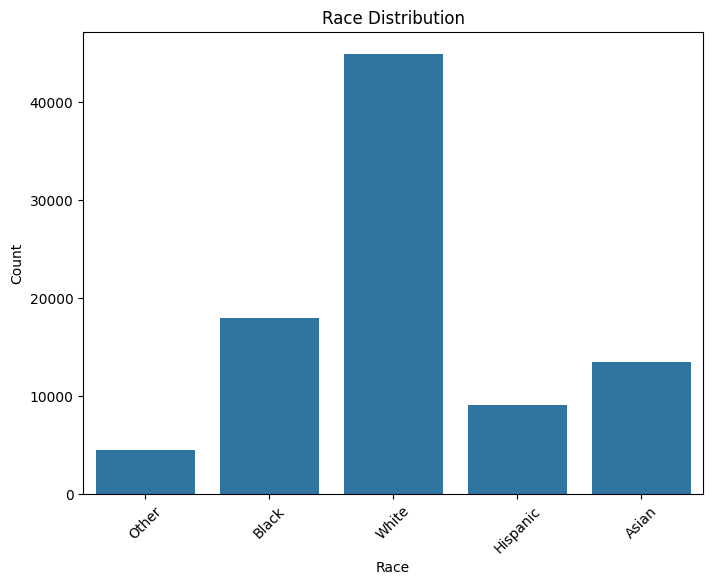

In [11]:
## Categorical Distribution - Race
plt.figure(figsize=(8, 6))
sns.countplot(x='Race', data=df)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The dataset shows that White patients have the highest count, representing the majority of participants in the study. This finding is important as it may reflect demographic trends in colorectal health within the population being studied. However, it also highlights the need for further research to explore potential differences in colorectal health outcomes across different racial and ethnic groups. Understanding how race influences risk factors, prevalence, and treatment responses in colorectal conditions could help refine approaches to prevention and care.



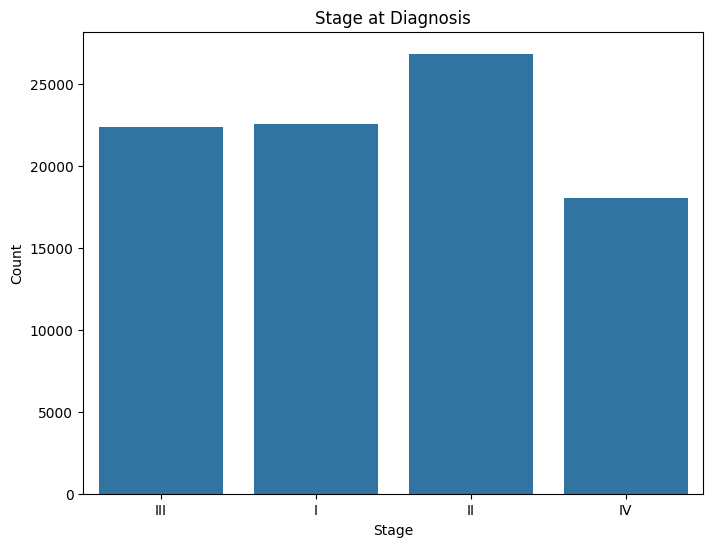

In [12]:

## Stage at Diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage_at_Diagnosis', data=df)
plt.title('Stage at Diagnosis')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()


The dataset reveals that most patients were diagnosed at stage 3, indicating that a significant proportion of individuals in this study presented with more advanced colorectal cancer at the time of diagnosis. This finding underscores the importance of early detection and screening programs to identify colorectal cancer at earlier stages when treatment outcomes may be more favorable. The relatively high number of stage 3 diagnoses suggests that there may be barriers to early diagnosis that need to be addressed in future research or clinical practices.

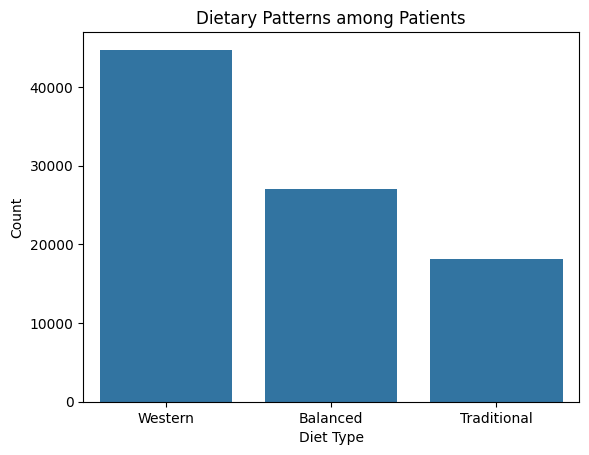

In [22]:
##What is the distribution of dietary patterns (e.g., diet type) among patients?
sns.countplot(x='Diet_Type', data=df)
plt.title('Dietary Patterns among Patients')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis (Exploring relationships between variables)


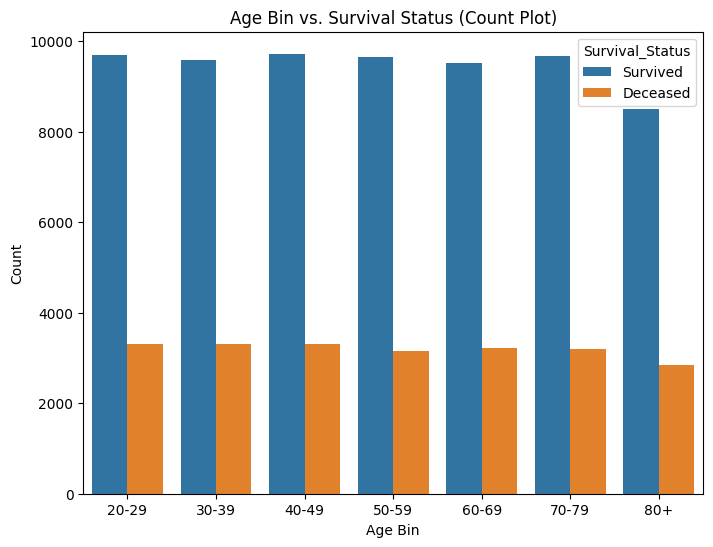

In [13]:
## Age vs. Survival Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Bin', hue='Survival_Status', data=df)
plt.title('Age Bin vs. Survival Status (Count Plot)')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.show()

C:\Users\SD\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


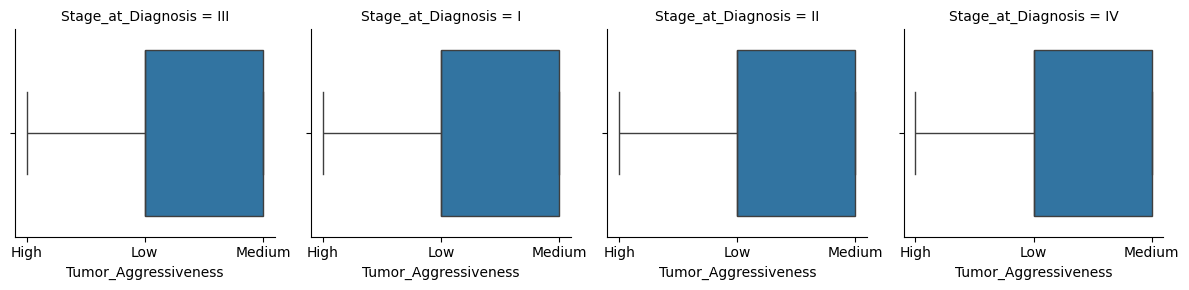

In [19]:
##How does tumor aggressiveness vary with different stages?

g = sns.FacetGrid(df, col='Stage_at_Diagnosis')
g.map(sns.boxplot, 'Tumor_Aggressiveness')
plt.show()

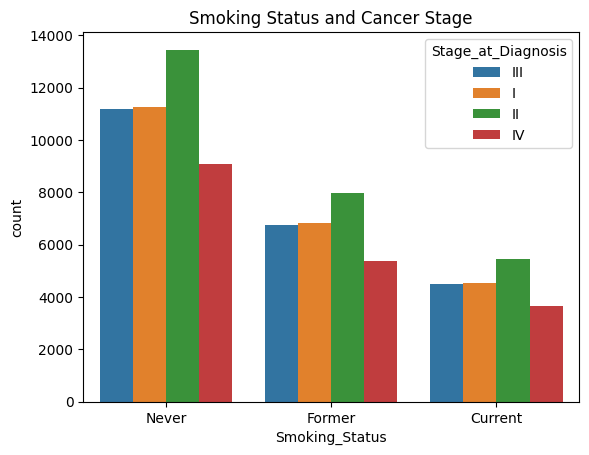

In [23]:
##How does smoking status affect cancer progression?

sns.countplot(x='Smoking_Status', hue='Stage_at_Diagnosis', data=df)
plt.title('Smoking Status and Cancer Stage')
plt.show()

In the analysis of cancer stages, it was observed that individuals who have never smoked constitute the highest proportion across all stages of cancer. This suggests a notable trend in the distribution of cancer stages among smoking status groups. The data indicates that non-smokers are more frequently diagnosed at various stages of cancer compared to smokers. This finding could imply potential differences in the risk factors and progression of cancer based on smoking history, highlighting the need for further investigation into the relationship between smoking and cancer development at different stages

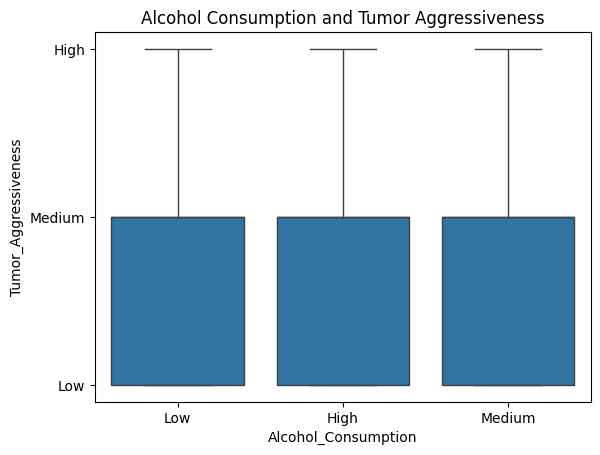

In [24]:

## What is the impact of alcohol consumption on cancer risk?
sns.boxplot(x='Alcohol_Consumption', y='Tumor_Aggressiveness', data=df)
plt.title('Alcohol Consumption and Tumor Aggressiveness')
plt.show()


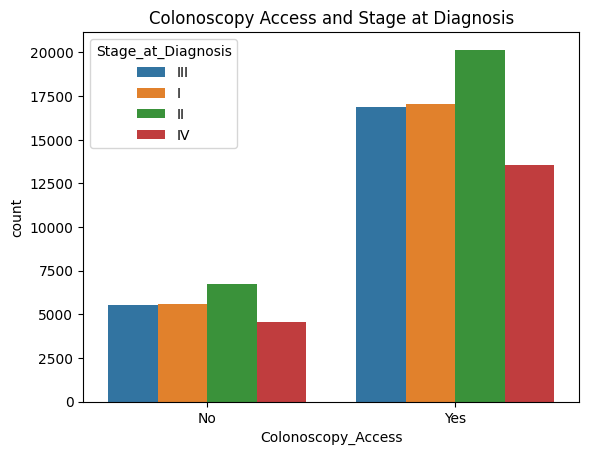

In [27]:
##b How does colonoscopy access correlate with early detection and stage at diagnosis?

sns.countplot(x='Colonoscopy_Access', hue='Stage_at_Diagnosis', data=df)
plt.title('Colonoscopy Access and Stage at Diagnosis')
plt.show()

Patients with access to colonoscopy had the highest number of cancer detections across various stages compared to those without colonoscopy access. This trend suggests that colonoscopy availability plays a significant role in the earlier detection and diagnosis of cancer. The findings emphasize the importance of screening and access to diagnostic tools in identifying cancer at different stages, potentially leading to earlier intervention and improved patient outcomes.

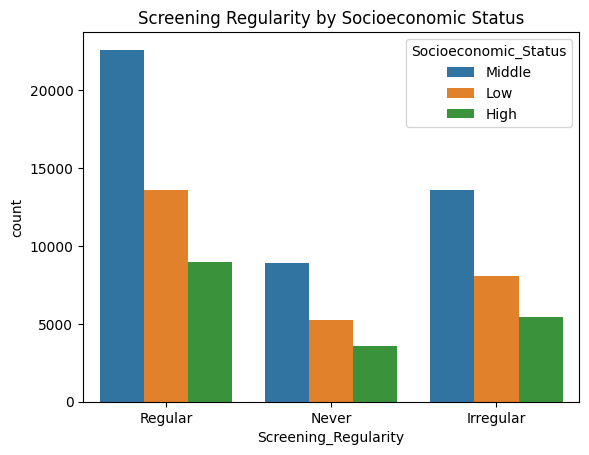

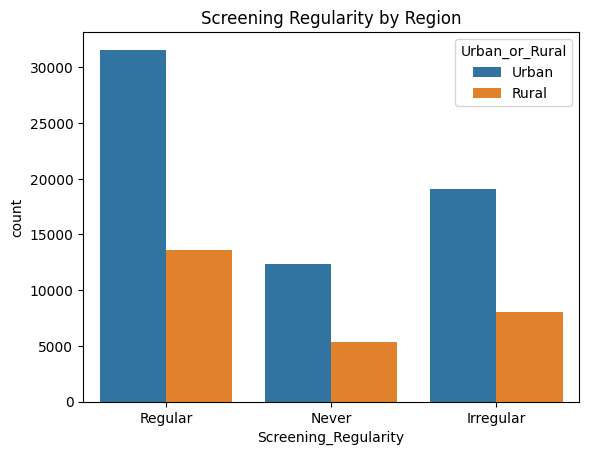

In [28]:
 ##What is the frequency of regular cancer screenings across different socioeconomic and geographic groups?

sns.countplot(x='Screening_Regularity', hue='Socioeconomic_Status', data=df)
plt.title('Screening Regularity by Socioeconomic Status')
plt.show()

sns.countplot(x='Screening_Regularity', hue='Urban_or_Rural', data=df)
plt.title('Screening Regularity by Region')
plt.show()

Middle-class and high class patients residing in urban areas are more likely to engage in regular cancer screening. This pattern suggests that access to healthcare facilities, higher awareness, and financial stability in urban environments may contribute to a greater likelihood of participation in preventive healthcare measures such as regular cancer screenings. The findings highlight the potential disparities in screening practices based on socioeconomic status and geographic location, which could influence early detection and overall health outcomes.

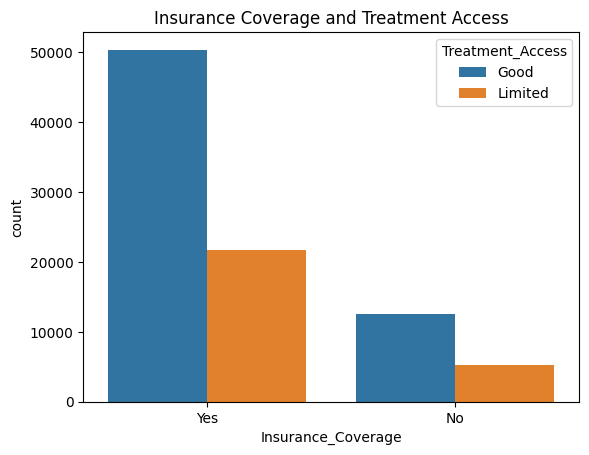

In [30]:
## How does insurance coverage affect treatment access (chemotherapy, radiotherapy, surgery)?

sns.countplot(x='Insurance_Coverage', hue='Treatment_Access', data=df)
plt.title('Insurance Coverage and Treatment Access')
plt.show()

Patients with insurance coverage tend to receive more comprehensive and effective treatment. This is reflected in better access to healthcare services, timely interventions, and a wider range of treatment options compared to uninsured patients. The findings underscore the critical role that insurance coverage plays in ensuring patients receive the necessary care, potentially leading to improved health outcomes and more favorable prognoses.

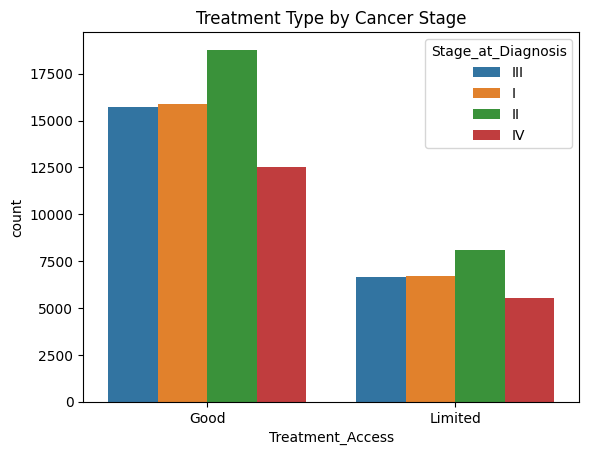

In [31]:
# What are the treatment patterns across different stages of cancer?

sns.countplot(x='Treatment_Access', hue='Stage_at_Diagnosis', data=df)
plt.title('Treatment Type by Cancer Stage')
plt.show()

Most patients in the dataset diagnosed with Stage I to Stage IV cancer received good treatment, with access to a broader range of therapies and more comprehensive care. This  highlights the importance of early detection and intervention in improving treatment outcomes, as patients in the earlier stages tend to benefit from more aggressive and effective treatment regimens.

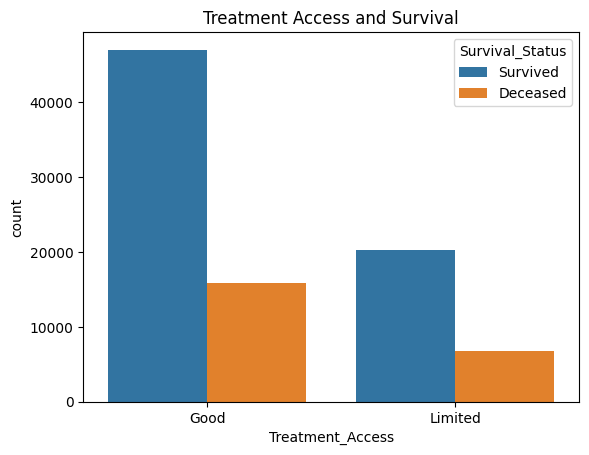

In [36]:
## What is the relationship between treatment access and survival rates?

sns.countplot(x='Treatment_Access', hue='Survival_Status', data=df)
plt.title('Treatment Access and Survival')
plt.show()

Most patients who received good treatment survived their diagnosis, highlighting the critical role of timely and effective healthcare interventions in improving patient outcomes. Access to comprehensive treatment options, particularly in the early stages of cancer, significantly increases survival rates, emphasizing the importance of adequate medical care in cancer management.



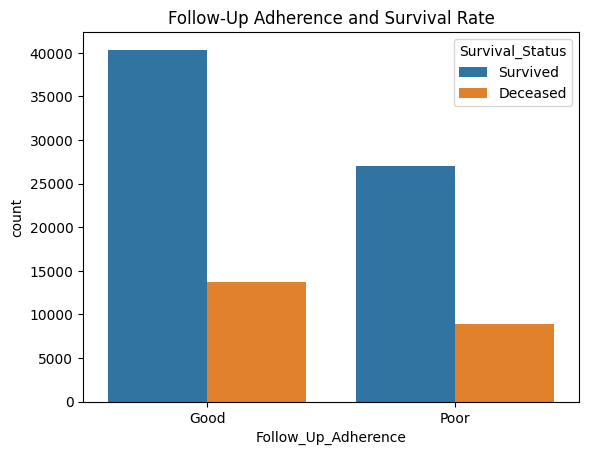

In [37]:
 # How does adherence to follow-up affect survival rate?

sns.countplot(x='Follow_Up_Adherence', hue='Survival_Status', data=df)
plt.title('Follow-Up Adherence and Survival Rate')
plt.show()

Most patients who adhered to follow-up care demonstrated higher survival rates. Consistent follow-up appointments are crucial for monitoring treatment progress, detecting potential complications early, and ensuring timely interventions. This finding underscores the importance of patient compliance with follow-up care as a key factor in improving long-term survival outcomes.

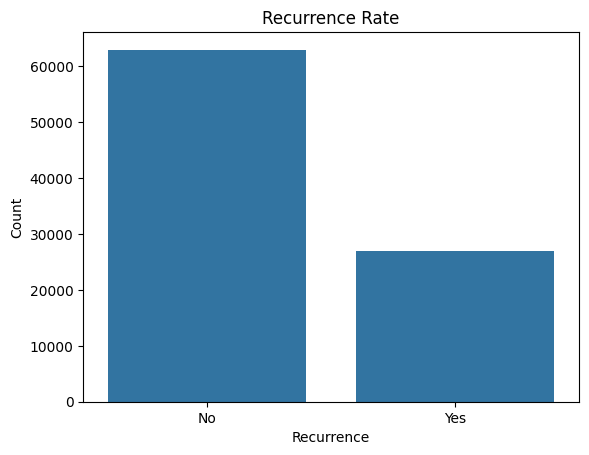

In [38]:
# What is the recurrence rate of cancer?

sns.countplot(x='Recurrence', data=df)
plt.title('Recurrence Rate')
plt.xlabel('Recurrence')
plt.ylabel('Count')
plt.show()

The recurrence rate among most patients was low, suggesting that the treatments provided were effective in reducing the likelihood of cancer returning. This finding highlights the success of current treatment protocols in managing and controlling cancer, particularly for patients who received timely and appropriate interventions.

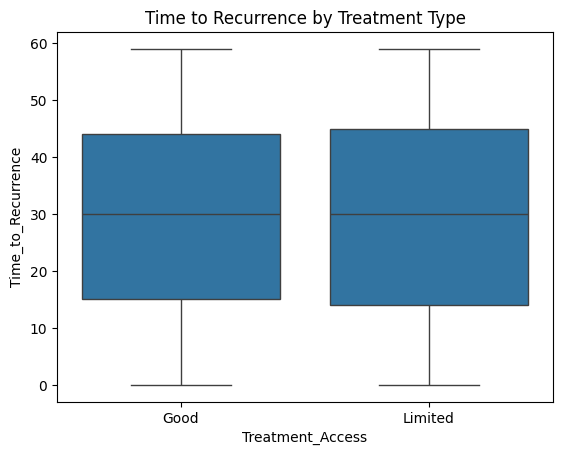

In [39]:
# How long does it take for patients to experience recurrence after treatment?

sns.boxplot(x='Treatment_Access', y='Time_to_Recurrence', data=df)
plt.title('Time to Recurrence by Treatment Type')
plt.show()

### Summary of Findings:

1. **Smoking Status and Cancer Stages:**
   - Individuals who have never smoked represent the highest proportion across all cancer stages, suggesting that smoking status may influence cancer risk and stage at diagnosis.

2. **Colonoscopy Access:**
   - Patients with access to colonoscopy had higher cancer detection rates across various stages compared to those without access, emphasizing the importance of screening for early cancer detection.

3. **Socioeconomic Factors and Screening:**
   - Middle-class patients residing in urban areas are more likely to engage in regular cancer screening, highlighting the influence of socioeconomic status and geographic location on access to preventive care.

4. **Insurance Coverage and Treatment:**
   - Patients with insurance coverage generally receive more comprehensive and effective treatment, underscoring the significant role that insurance plays in improving access to necessary healthcare services.

5. **Stage of Cancer and Treatment Outcomes:**
   - Patients diagnosed with Stage I and II cancer tend to receive better treatment and have higher survival rates compared to those diagnosed at later stages. Early detection and intervention are key factors in successful treatment outcomes.

6. **Adherence to Follow-Up Care:**
   - Patients who adhered to follow-up care had higher survival rates, reinforcing the importance of continuous monitoring and timely interventions for improving long-term outcomes.

7. **Low Recurrence Rate:**
   - The recurrence rate among most patients was low, suggesting that current treatment protocols are effective in preventing cancer from returning after initial treatment.

### Recommendations:

1. **Enhance Screening Access and Awareness:**
   - Expanding access to cancer screening, especially colonoscopy, in underserved areas and among high-risk populations can lead to earlier detection and better outcomes. Efforts should be made to raise awareness of the importance of regular screening.

2. **Improve Healthcare Accessibility:**
   - Policies should focus on increasing healthcare access for middle-class and rural populations, ensuring that all individuals, regardless of their socioeconomic status or location, can access preventive services like cancer screenings.

3. **Strengthen Insurance Coverage:**
   - Expanding insurance coverage for uninsured or underinsured patients can improve access to comprehensive treatment and enhance cancer care outcomes. Addressing healthcare disparities through better insurance options should be a priority.

4. **Focus on Early Detection and Treatment:**
   - Early detection and intervention remain critical in improving survival rates. Strategies should focus on improving early-stage cancer diagnoses, particularly for patients who are at lower risk (e.g., non-smokers).

5. **Encourage Follow-Up Care Compliance:**
   - Public health campaigns and healthcare providers should emphasize the importance of regular follow-up care, as adherence to these appointments significantly contributes to improved survival rates and better long-term outcomes.

6. **Monitor Long-Term Recurrence Rates:**
   - Continued research and surveillance are needed to understand recurrence patterns and improve treatments to further reduce recurrence rates, ensuring that patients with advanced cancer stages also receive effective care.

By focusing on these areas, it is possible to improve cancer detection, treatment, and outcomes for a wider range of patients.